# Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the csv files and remove duplicates

In [6]:
df = pd.read_csv('crime.csv', encoding="ISO-8859-11")

In [7]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
df.shape

(319073, 17)

In [10]:
df.duplicated().sum()

23

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(319050, 17)

# Explore the dataset

In [13]:
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [27]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OFFENSE_CODE,319050.0,2317.516957,1185.308921,111.000000,1001.000000,2907.000000,3201.000000,3831.000000
YEAR,319050.0,2016.560674,0.996312,2015.000000,2016.000000,2017.000000,2017.000000,2018.000000
MONTH,319050.0,6.609622,3.273677,1.000000,4.000000,7.000000,9.000000,12.000000
HOUR,319050.0,13.118176,6.294258,0.000000,9.000000,14.000000,18.000000,23.000000
Lat,299052.0,42.214373,2.159845,-1.000000,42.297438,42.325538,42.348624,42.395042
Long,299052.0,-70.908260,3.493746,-71.178674,-71.097135,-71.077524,-71.062467,-1.000000


In [29]:
df.describe(include='object').transpose()

,count,unique,top,freq
INCIDENT_NUMBER,319050,282517,I162030584,13
OFFENSE_CODE_GROUP,319050,67,Motor Vehicle Accident Response,37132
OFFENSE_DESCRIPTION,319050,244,SICK/INJURED/MEDICAL - PERSON,18783
DISTRICT,317285,12,B2,49940
REPORTING_AREA,319050,879,,20250
SHOOTING,1019,1,Y,1019
DAY_OF_WEEK,319050,7,Friday,48489
UCR_PART,318960,4,Part Three,158537
STREET,308179,4657,WASHINGTON ST,14192
Location,319050,18194,"(0.00000000, 0.00000000)",19998


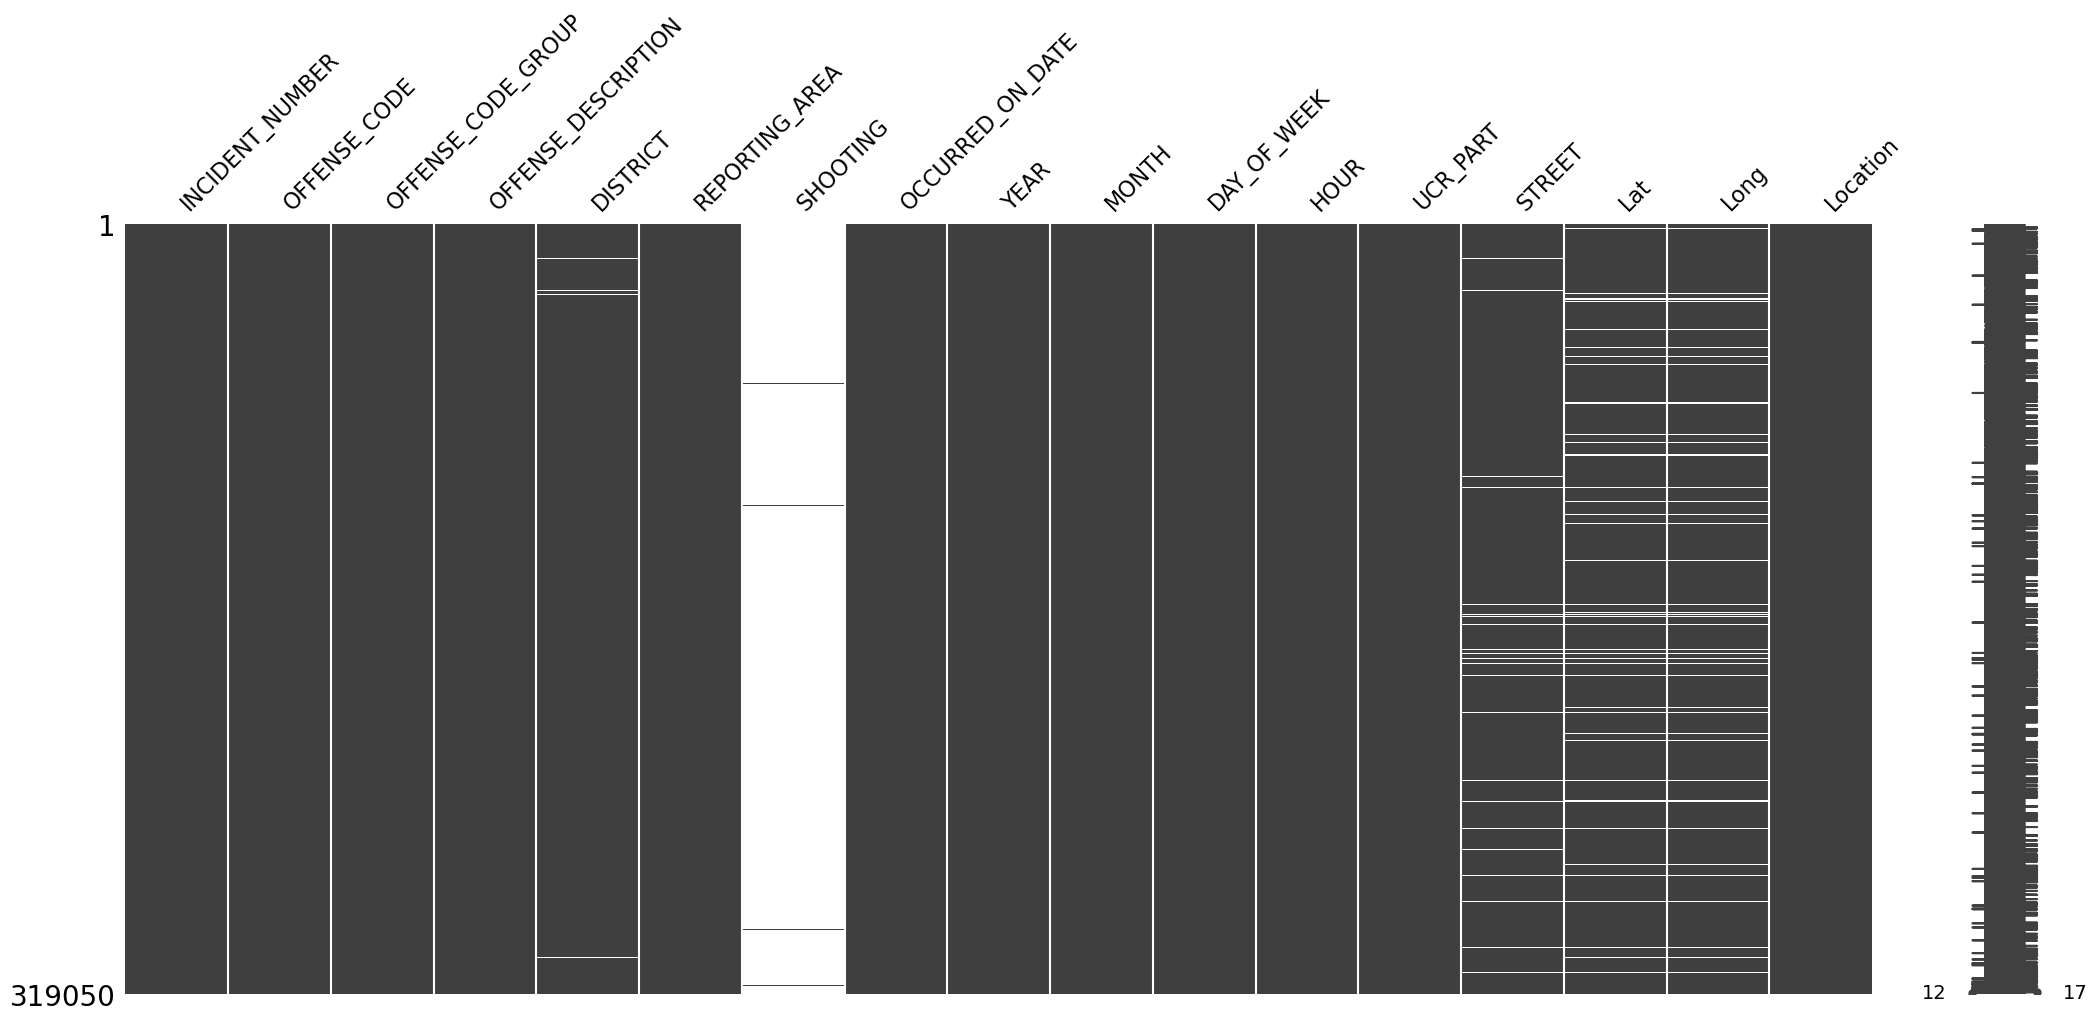

In [19]:
import missingno as msno
msno.matrix(df)
# plt.figure(figsize=(1, 2))
plt.show()

In [22]:
df.isna().sum()/len(df)

INCIDENT_NUMBER        0.000000
OFFENSE_CODE           0.000000
OFFENSE_CODE_GROUP     0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.005532
REPORTING_AREA         0.000000
SHOOTING               0.996806
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.000282
STREET                 0.034073
Lat                    0.062680
Long                   0.062680
Location               0.000000
dtype: float64

# Answer Some Questions 

#### Q1 : What are the most common crimes in terms of offense group?

In [60]:
df['OFFENSE_CODE_GROUP']

0                      Larceny
1                    Vandalism
2                        Towed
3         Investigate Property
4         Investigate Property
                  ...         
319068         Warrant Arrests
319069                Homicide
319070         Warrant Arrests
319071         Warrant Arrests
319072         Warrant Arrests
Name: OFFENSE_CODE_GROUP, Length: 319050, dtype: object

In [66]:
data = (df['OFFENSE_CODE_GROUP'].value_counts() / len(df)).reset_index()
data

,index,OFFENSE_CODE_GROUP
0,Motor Vehicle Accident Response,0.116383
1,Larceny,0.081288
2,Medical Assistance,0.073782
3,Investigate Person,0.058765
4,Other,0.056646
...,...,...
62,HUMAN TRAFFICKING,0.000022
63,INVESTIGATE PERSON,0.000013
64,Biological Threat,0.000006
65,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,0.000006


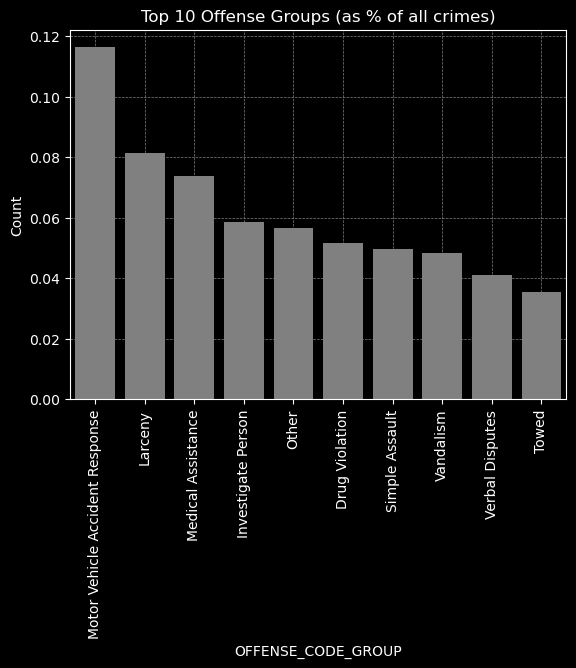

In [69]:
ax = sns.barplot(data = data.head(10), x='index', y='OFFENSE_CODE_GROUP', color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xlabel("OFFENSE_CODE_GROUP")
ax.set_ylabel("Count")
plt.title('Top 10 Offense Groups (as % of all crimes)')
plt.show()

### Q2 : What are the least common offense groups?

In [80]:
data = df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending=True).reset_index().query("index != 'INVESTIGATE PERSON'").head(10)
data

,index,OFFENSE_CODE_GROUP
0,Burglary - No Property Taken,2
1,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,2
2,Biological Threat,2
4,HUMAN TRAFFICKING,7
5,Gambling,8
6,Manslaughter,8
7,Explosives,27
8,Phone Call Complaints,31
9,Aircraft,36
10,Bomb Hoax,75


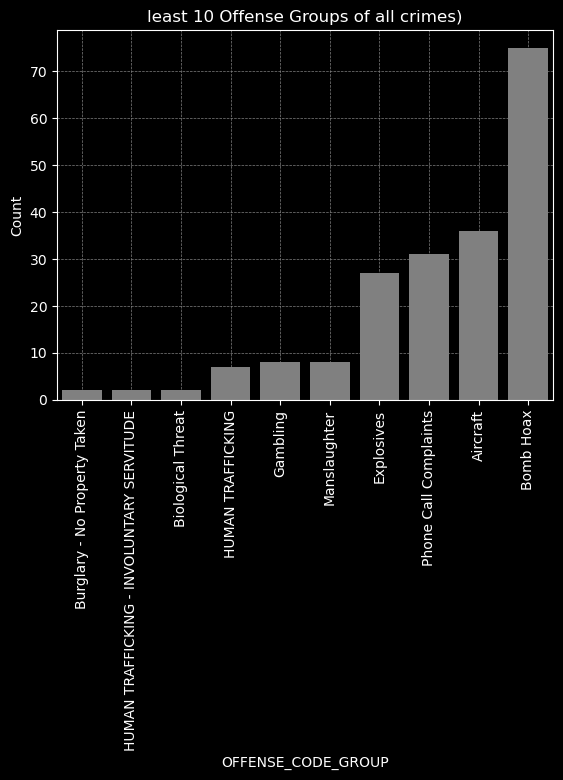

In [81]:
ax = sns.barplot(data = data, x='index', y='OFFENSE_CODE_GROUP', color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xlabel("OFFENSE_CODE_GROUP")
ax.set_ylabel("Count")
plt.title('least 10 Offense Groups of all crimes)')
plt.show()

### Q3 : What are the most common offense descriptions?

In [86]:
data = (df['OFFENSE_DESCRIPTION'].value_counts() / len(df)).reset_index().head(10)
data

,index,OFFENSE_DESCRIPTION
0,SICK/INJURED/MEDICAL - PERSON,0.058872
1,INVESTIGATE PERSON,0.058778
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,0.051161
3,VANDALISM,0.047494
4,ASSAULT SIMPLE - BATTERY,0.046360
5,VERBAL DISPUTE,0.041056
6,TOWED MOTOR VEHICLE,0.035377
7,INVESTIGATE PROPERTY,0.034866
8,LARCENY THEFT FROM BUILDING,0.028425
9,THREATS TO DO BODILY HARM,0.028340


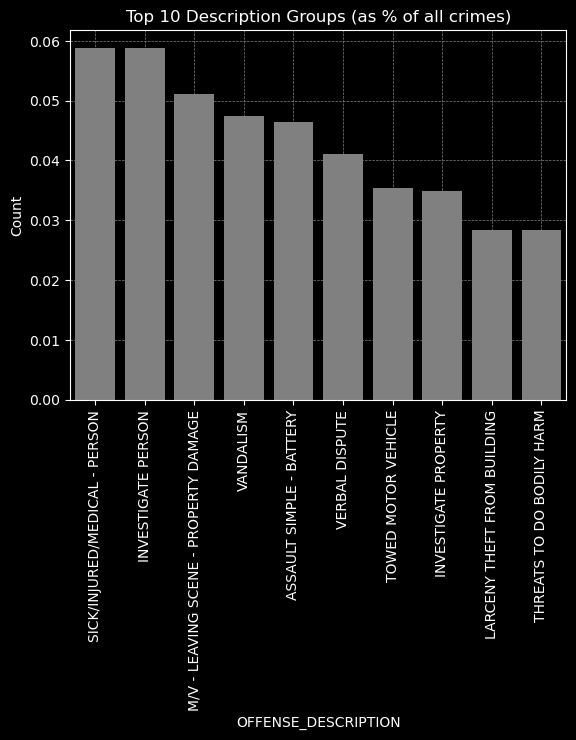

In [87]:
ax = sns.barplot(data = data, x='index', y='OFFENSE_DESCRIPTION', color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
ax.set_xlabel("OFFENSE_DESCRIPTION")
ax.set_ylabel("Count")
plt.title('Top 10 Description Groups (as % of all crimes)')
plt.show()

### Q3 : In which year were the most crimes committed?

In [94]:
df.groupby('YEAR').count()['INCIDENT_NUMBER'].reset_index()

,YEAR,INCIDENT_NUMBER
0,2015,53371
1,2016,99110
2,2017,100884
3,2018,65685


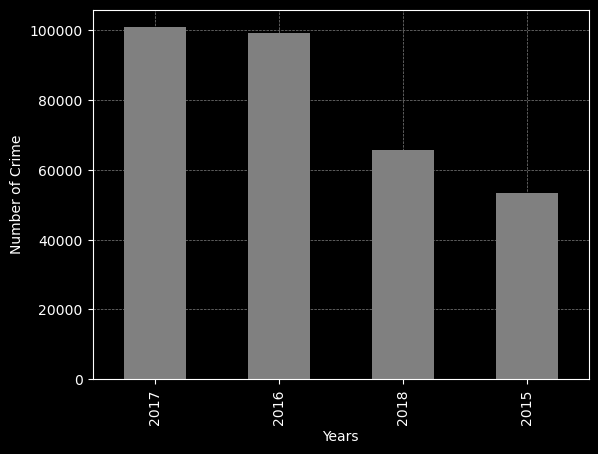

In [101]:
ax = df['YEAR'].value_counts().plot(kind='bar',color='gray')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Crime')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q4 : Are there more crimes committed on specific days?

In [102]:
df.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].reset_index()

,DAY_OF_WEEK,INCIDENT_NUMBER
0,Friday,48489
1,Monday,45674
2,Saturday,44816
3,Sunday,40313
4,Thursday,46655
5,Tuesday,46376
6,Wednesday,46727


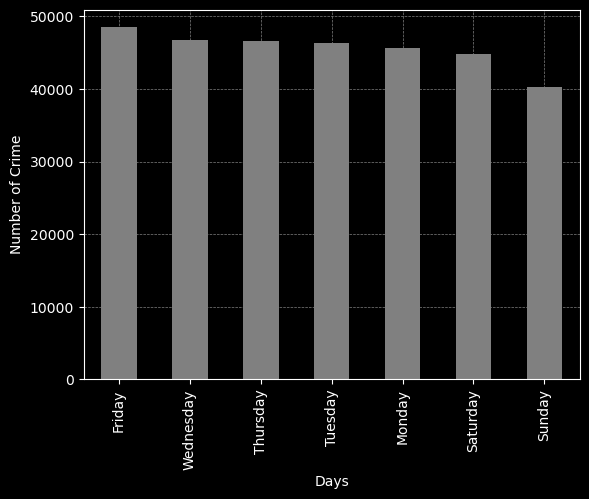

In [104]:
ax = df['DAY_OF_WEEK'].value_counts().plot(kind='bar',color='gray')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Crime')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q5 :  Are there more crimes during specific hours?

In [105]:
df.groupby('HOUR').count()['INCIDENT_NUMBER'].reset_index()

,HOUR,INCIDENT_NUMBER
0,0,15106
1,1,9267
2,2,7693
3,3,4589
4,4,3408
5,5,3311
6,6,5026
7,7,8850
8,8,13042
9,9,14740


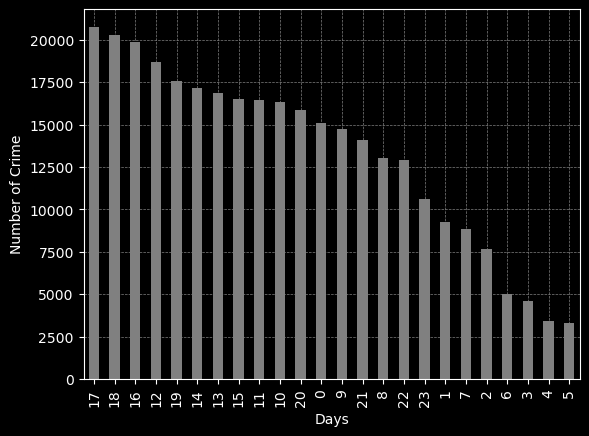

In [106]:
ax = df['HOUR'].value_counts().plot(kind='bar',color='gray')
ax.set_xlabel('Days')
ax.set_ylabel('Number of Crime')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Q6 : On what days and during which hours are the most crimes committed?

In [127]:
data = df.groupby(['DAY_OF_WEEK', 'HOUR']).count()['INCIDENT_NUMBER'].reset_index()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DAY_OF_WEEK      168 non-null    object
 1   HOUR             168 non-null    int64 
 2   INCIDENT_NUMBER  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


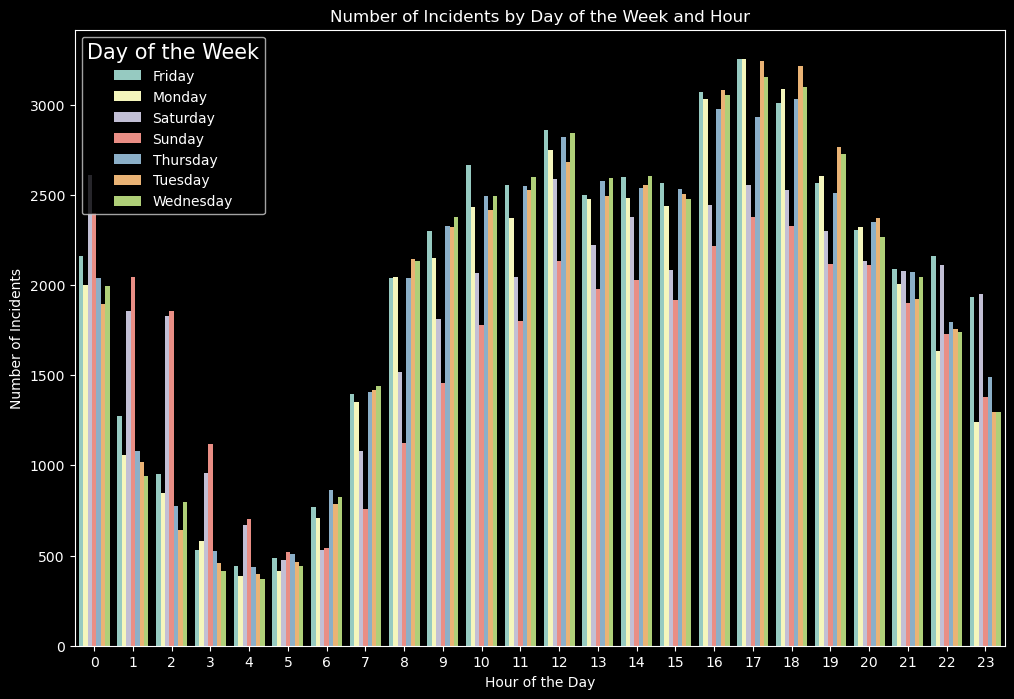

In [129]:
plt.figure(figsize=(12, 8))
sns.barplot(x='HOUR', y='INCIDENT_NUMBER', hue='DAY_OF_WEEK', data=data)

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Incidents")
plt.title("Number of Incidents by Day of the Week and Hour")

plt.legend(title="Day of the Week", title_fontsize='15')
plt.show()

### Q7 : In which districts were the most crimes commmitted on yearly basis?

In [138]:
data = df.groupby(['YEAR', 'DISTRICT']).count()['INCIDENT_NUMBER'].unstack()
data

DISTRICT,A1,A15,A7,B2,B3,C11,C6,D14,D4,E13,E18,E5
YEAR,,,,,,,,,,,,
2015,6010,1027,2426,8682,5616,7363,3939,3280,7203,2800,2740,2157
2016,10922,1986,4130,15706,11145,13602,7072,6279,12953,5558,5223,4017
2017,11374,2167,4264,15680,11195,13281,7247,6509,13157,5514,5611,4309
2018,7404,1325,2724,9872,7485,8282,5199,4059,8601,3662,3773,2755


<AxesSubplot:xlabel='DISTRICT', ylabel='YEAR'>

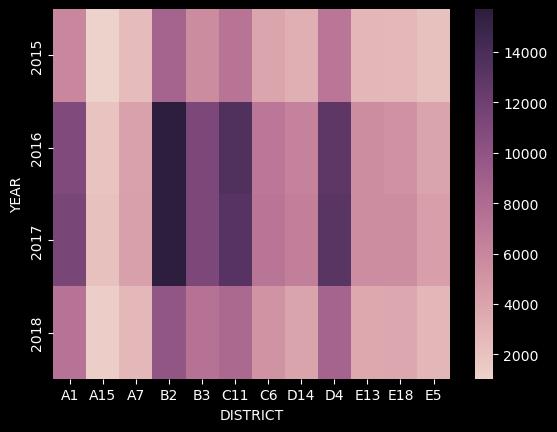

In [147]:
sns.heatmap(data, cmap=sns.cubehelix_palette(as_cmap=True))
